In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os 
import cv2

In [2]:
os.getcwd()

'C:\\Users\\maracrasava\\Desktop\\Projects\\Machine learning\\Neural Network\\Naruto'

In [3]:
os.chdir('D:')

In [4]:
os.getcwd()

'D:\\'

In [5]:
os.listdir()

['$RECYCLE.BIN',
 'Anaconda',
 'Cheat Engine 7.1',
 'Config.Msi',
 'download',
 'Epic Games',
 'FortiClient VPN',
 'Games',
 'Grand Theft Auto San Andreas',
 'Grand Theft Auto San Andreas by Igruha',
 'install_tools.bat',
 'KillingFloor2',
 'Launcher',
 'Microsoft VS Code',
 'Mono',
 'mono.msi',
 'msdownld.tmp',
 'naruto_anime',
 'node.exe',
 'nodevars.bat',
 'node_etw_provider.man',
 'node_modules',
 'npm',
 'npm.cmd',
 'npx',
 'npx.cmd',
 'OneDrive - nu.edu.kz',
 'OneDriveTemp',
 'PyCharm 2020.1.2',
 'PyCharm Community Edition 2020.1.2',
 'Sekiro Shadows Die Twice',
 'Shadow of the Tomb Raider',
 'SteamLibrary',
 'System',
 'System Volume Information',
 'System64',
 'The Witcher 3 Wild Hunt']

In [6]:
root_directory = os.path.join(os.getcwd(), 'naruto_anime')
os.chdir(root_directory)

In [7]:
os.listdir()

['naruto', 'sakura', 'sasuke', 'testing']

In [143]:
training_data =[]
characters = ['naruto', 'sakura', 'sasuke']


for c in characters:
    path = os.path.join(root_directory, c)
    class_num = characters.index(c)         # Making index label
    for i in os.listdir(path):
        try:
            # 4th rank Tensor (1318, 70, 70, 3)
            array_images = cv2.imread(os.path.join(path, i), cv2.IMREAD_COLOR)
            rgb_images = cv2.cvtColor(array_images, cv2.COLOR_BGR2RGB) 
            SHAPE_IMAGE = 70
            shaped_images = cv2.resize(rgb_images, (SHAPE_IMAGE, SHAPE_IMAGE))
        except Exception as e:
            pass
        """
        plt.imshow(shaped_images)
        plt.show()
        """
        training_data.append([shaped_images, class_num])   

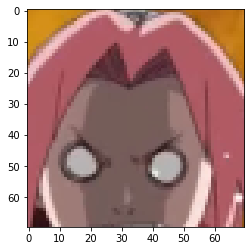

(70, 70, 3)
(1318, 2)


In [215]:
import random

random.shuffle(training_data)
plt.imshow(shaped_images)
plt.show()
print(shaped_images.shape)
print(np.array(training_data).shape)


In [102]:
path_test = os.path.join(root_directory, "testing")
print(path_test)

D:\naruto_anime\testing


In [220]:
test_folders = ['naruto_test', 'sakura_test', 'sasuke_test']
all_test_images = []


for f in test_folders:
    path_test_folders = os.path.join(path_test, f)
    # print(path_test_folders)
    class_number = test_folders.index(f)
    for i in os.listdir(path_test_folders):
        try:
            test_images = cv2.imread(os.path.join(path_test_folders, i), cv2.IMREAD_COLOR)
            turnto_rgb = cv2.cvtColor(test_images, cv2.COLOR_BGR2RGB)
            resized_test = cv2.resize(turnto_rgb, (70, 70))
            all_test_images.append([resized_test, class_number])
        except Exception as e:
            pass

(70, 70, 3)
(165, 2)


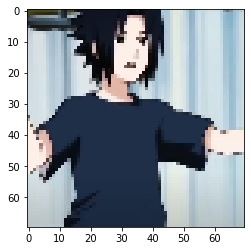

In [227]:
random.shuffle(all_test_images)
print(resized_test.shape)
print(np.array(all_test_images).shape)
plt.imshow(resized_test)
plt.show()

In [228]:
for label in all_test_images[:5]:
    # label[1] prints class nums, label[0] prints features(img array)
    print(f"Labels of test:{label[1]}")
for label in training_data[:5]:
    print(f"Labels of train.:{label[1]}")

Labels of test:0
Labels of test:1
Labels of test:0
Labels of test:2
Labels of test:2
Labels of train.:0
Labels of train.:1
Labels of train.:0
Labels of train.:2
Labels of train.:2


In [243]:
X = []
y = []
X_test = []
y_test = []

for features, labels in training_data:
        X.append(features)
        y.append(labels)
        
for features, labels in all_test_images:
        X_test.append(features)
        y_test.append(labels)
    
# reshape(any # of features, w, h, dimensions)
X = np.array(X).reshape(-1, 70, 70, 3)
# Labels also must be converted to array
y = np.array(y)
X_test = np.array(X).reshape(-1, 70, 70, 3)
y_test = np.array(y_test)

In [230]:
# To save data
import pickle 

os.chdir('C:\\Users\\maracrasava\\Desktop\\Projects\\Machine learning\\Neural Network\\Naruto')

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()


In [236]:
# Creating a model

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(70,70,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(3))

In [240]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [247]:
# Compiling the model

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
"""
# RGB image is in range 0-255, normalize it to 0-1
train_images = X / 255
test_images = X_test / 255
"""

# Giving data to model

history = model.fit(X, y, epochs=10, validation_split=0.1)

Epoch 1/10
38/38 [==============================] - 2s 60ms/step - loss: 0.5493 - accuracy: 0.8364 - val_loss: 0.4587 - val_accuracy: 0.8409
Epoch 2/10
38/38 [==============================] - 2s 54ms/step - loss: 0.3718 - accuracy: 0.8988 - val_loss: 0.5363 - val_accuracy: 0.8561
Epoch 3/10
38/38 [==============================] - 2s 55ms/step - loss: 0.2962 - accuracy: 0.9056 - val_loss: 1.7836 - val_accuracy: 0.7424
Epoch 4/10
38/38 [==============================] - 2s 55ms/step - loss: 0.2573 - accuracy: 0.9224 - val_loss: 0.2920 - val_accuracy: 0.8864
Epoch 5/10
38/38 [==============================] - 2s 54ms/step - loss: 0.2287 - accuracy: 0.9266 - val_loss: 0.3457 - val_accuracy: 0.8561
Epoch 6/10
38/38 [==============================] - 2s 55ms/step - loss: 0.1882 - accuracy: 0.9401 - val_loss: 0.4320 - val_accuracy: 0.8939
Epoch 7/10
38/38 [==============================] - 2s 54ms/step - loss: 0.1493 - accuracy: 0.9519 - val_loss: 0.3940 - val_accuracy: 0.8939
Epoch 8/10
38

In [249]:
# Predicting on new images
prediction = model.predict(X_test)
for i in range(len(prediction)):
    print(f"Prediction: {test_folders[np.argmax(prediction[i])]}, Actual: {test_folders[int(y_test[i])]} ")

Prediction: naruto_test, Actual: naruto_test 
Prediction: sakura_test, Actual: sakura_test 
Prediction: naruto_test, Actual: naruto_test 
Prediction: sakura_test, Actual: sasuke_test 
Prediction: sakura_test, Actual: sasuke_test 
Prediction: sakura_test, Actual: sakura_test 
Prediction: sakura_test, Actual: naruto_test 
Prediction: naruto_test, Actual: sasuke_test 
Prediction: naruto_test, Actual: sasuke_test 
Prediction: sakura_test, Actual: naruto_test 
Prediction: naruto_test, Actual: naruto_test 
Prediction: naruto_test, Actual: sakura_test 
Prediction: naruto_test, Actual: sakura_test 
Prediction: naruto_test, Actual: naruto_test 
Prediction: sakura_test, Actual: sakura_test 
Prediction: sakura_test, Actual: sakura_test 
Prediction: sakura_test, Actual: sakura_test 
Prediction: naruto_test, Actual: naruto_test 
Prediction: naruto_test, Actual: sasuke_test 
Prediction: naruto_test, Actual: sakura_test 
Prediction: naruto_test, Actual: sakura_test 
Prediction: sakura_test, Actual: n

IndexError: index 165 is out of bounds for axis 0 with size 165